In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [22]:
#load crime data
crime_data = pd.read_csv('../data/Crime_data_2012.csv')

crime_data = crime_data.T

column_names = crime_data.iloc[0]
columns = column_names.tolist()
crime_data.columns = columns

crime_data = crime_data.iloc[1:]
crime_data = crime_data.sort_index()

crime_data.to_csv('out.csv')
crime_data = pd.read_csv('out.csv')
crime_data.rename(columns={'Unnamed: 0':'District'},inplace=True)
#crime_data.set_index("District",drop=True,inplace=True)

print("Data set size : ", crime_data.shape)

crime_data.head()

Data set size :  (25, 23)


,District,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,Rape / Incest,...,Extortion,"Cheating/Misappropriation C.B. Trust over Rs.100,000/=",Theft of Property including praedial produce over Rs. 5000/ & cycle cattle theft irrrespective of their value,Counterfeiting Currency,Offences against State,Cruelty to Children & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possession of Automatic or Repeater Shot Guns,"Offences under the Poisons, Opium & Dangerous Drugs Ord. Quantity as indicated in Circular NO. 1540/2000"
0,Ampara,29,31,36,239,69,38,16,12,37,...,2,232,242,1,0,1,2,1,0,1
1,Anuradhapura,68,47,107,834,108,72,24,15,199,...,9,270,584,6,0,23,2,4,1,7
2,Badulla,38,14,42,359,112,85,28,11,73,...,1,138,296,1,0,2,0,3,0,20
3,Batticaloa,21,33,38,227,56,89,11,2,52,...,4,225,221,1,0,6,3,1,1,3
4,Colombo,154,22,140,2996,248,379,62,21,120,...,37,1736,2809,4,0,52,1,21,6,573


In [33]:
fp1 = "../data/LKA_adm1.shp"
map_df_1 = gpd.read_file(fp1)
map_df_1.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,217,LKA,Sri Lanka,1,Ampara,Distrikkaya,District,None,Amparai,(POLYGON ((81.78319549560564 7.448750019073543...
1,217,LKA,Sri Lanka,2,Anuradhapura,Distrikkaya,District,None,None,"POLYGON ((80.79398345947294 8.917964935302848,..."
2,217,LKA,Sri Lanka,3,Badulla,Distrikkaya,District,None,None,"POLYGON ((80.98494720458979 7.61256122589117, ..."
3,217,LKA,Sri Lanka,4,Batticaloa,Distrikkaya,District,None,None,(POLYGON ((81.80958557128912 7.494583129882926...
4,217,LKA,Sri Lanka,5,Colombo,Distrikkaya,District,None,None,(POLYGON ((79.90155029296903 6.714582920074406...


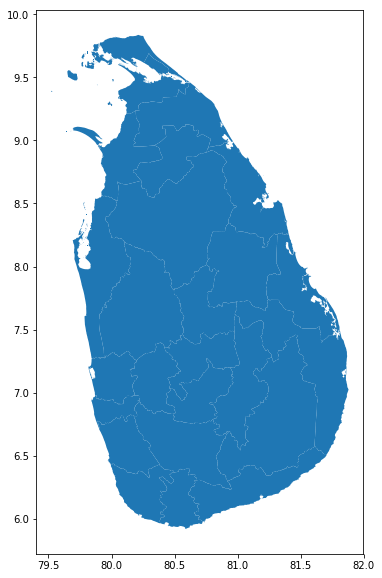

In [34]:
map_df_1.plot(figsize=(20,10)) #base map for sri lanka

In [35]:

# join the geodataframe with the cleaned up csv dataframe
merged = map_df_1.set_index("NAME_1").join(crime_data.set_index("District"))
merged.head()

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Abduction / Kidnapping,...,Extortion,"Cheating/Misappropriation C.B. Trust over Rs.100,000/=",Theft of Property including praedial produce over Rs. 5000/ & cycle cattle theft irrrespective of their value,Counterfeiting Currency,Offences against State,Cruelty to Children & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possession of Automatic or Repeater Shot Guns,"Offences under the Poisons, Opium & Dangerous Drugs Ord. Quantity as indicated in Circular NO. 1540/2000"
NAME_1,,,,,,,,,,,,,,,,,,,,,
Ampara,217,LKA,Sri Lanka,1,Distrikkaya,District,None,Amparai,(POLYGON ((81.78319549560564 7.448750019073543...,29,...,2,232,242,1,0,1,2,1,0,1
Anuradhapura,217,LKA,Sri Lanka,2,Distrikkaya,District,None,None,"POLYGON ((80.79398345947294 8.917964935302848,...",68,...,9,270,584,6,0,23,2,4,1,7
Badulla,217,LKA,Sri Lanka,3,Distrikkaya,District,None,None,"POLYGON ((80.98494720458979 7.61256122589117, ...",38,...,1,138,296,1,0,2,0,3,0,20
Batticaloa,217,LKA,Sri Lanka,4,Distrikkaya,District,None,None,(POLYGON ((81.80958557128912 7.494583129882926...,21,...,4,225,221,1,0,6,3,1,1,3
Colombo,217,LKA,Sri Lanka,5,Distrikkaya,District,None,None,(POLYGON ((79.90155029296903 6.714582920074406...,154,...,37,1736,2809,4,0,52,1,21,6,573


In [38]:
def plot_map(data_frame,variable):
    vmin, vmax = 120, 220
    fig, ax = plt.subplots(1, figsize=(20, 10))
    data_frame.plot(variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    #ax.axis(‘off’)
    ax.set_title(variable +' in Sri Lanka', fontdict={'fontsize': '25', 'fontweight' : '3'})
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

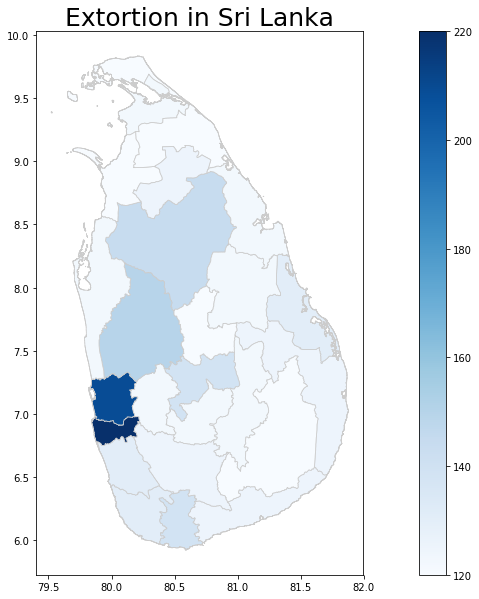

In [39]:
plot_map(merged,'Extortion')

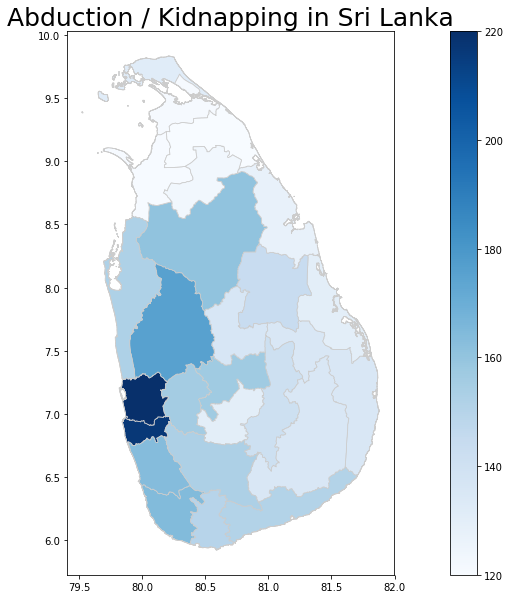

In [41]:
plot_map(merged,'Abduction / Kidnapping')

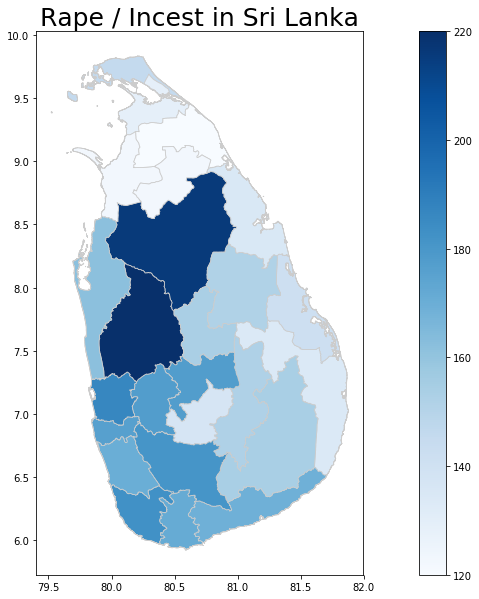

In [42]:
plot_map(merged,'Rape / Incest')

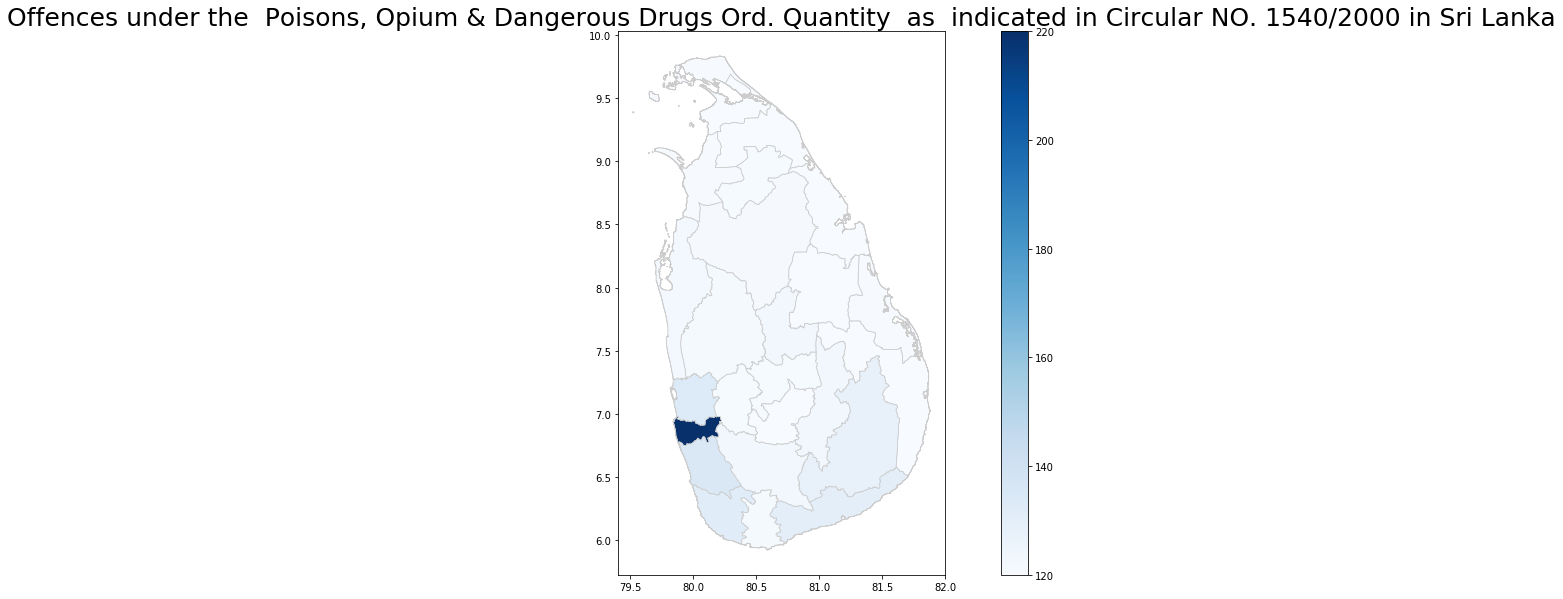

In [43]:
plot_map(merged,'Offences under the  Poisons, Opium & Dangerous Drugs Ord. Quantity  as  indicated in Circular NO. 1540/2000')